In [137]:
import pandas as pd

walmartPath="/Users/myself/Desktop/Walmart USA Serching for Growth/"

# Load the data from Excel files (Assuming the correct paths and sheet names)
cashflow_data = pd.read_excel(walmartPath+"walmartCashFlow.xlsx", skiprows=15)
store_count = pd.read_excel(walmartPath+"walmartCashFlow.xlsx", sheet_name="Yearly Store Count by Type", skiprows=2)
distribution_count = pd.read_excel(walmartPath+"walmartCashFlow.xlsx", sheet_name="Yearly DC", skiprows=1)

# Clean cashflow data
cashflow_data.iloc[:, 0] = cashflow_data.iloc[:, 0].str.replace('∟', '', regex=True)
cashflow_data.replace('\xa0', '', regex=True, inplace=True)
cashflow_data.replace('n.a.', pd.NA, inplace=True)
cashflow_data = cashflow_data.dropna(how='all', axis=1)
cashflow_data = cashflow_data.dropna(thresh=10)

# Assign year labels to cashflow data columns
number_of_years = cashflow_data.shape[1] - 1
base_year = 2022  # Adjust base year as appropriate
years = [str(base_year - i) for i in range(number_of_years)]
cashflow_data.columns = ['Cash Metric'] + years


def pivot_year_columns_to_rows(df,column_names):
    df_pivot = df.pivot_table(values=df.columns[1:],columns=df[column_names])
    df_pivot.index.name="Year"
    return df_pivot

cashflow_pivot=pivot_year_columns_to_rows(cashflow_data,'Cash Metric')  #cashflow_data.pivot_table(values=cashflow_data.columns,columns=cashflow_data['Cash Metric'])
store_pivot=pivot_year_columns_to_rows(store_count,'Year')

cashflow_data.columns[1:],cashflow_pivot.index
cashflow_pivot.columns
distribution_count

,Type,Center Point,Crossdock,Distribution Center,Food,Food Manufacture,Footwear,Import,Regional General Merchandise,Sams eCommerce Dark,...,Food.1,Food Manufacture.1,Footwear.1,Import.1,Regional General Merchandise.1,Sams eCommerce Dark.1,Specialty.1,Total.1,Vacated.1,eCommerce.1
0,Year Opened,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.368000e+05,236800.0,0.000000e+00
2,1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.368000e+05,236800.0,0.000000e+00
3,1976,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.868000e+05,236800.0,0.000000e+00
4,1978,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.069500e+06,236800.0,0.000000e+00
5,1980,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.775100e+06,236800.0,0.000000e+00
6,1981,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.668800e+06,236800.0,0.000000e+00
7,1983,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1200000.0,0.0,0.0,3.868800e+06,236800.0,0.000000e+00
8,1985,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,2444000.0,0.0,0.0,5.112800e+06,236800.0,0.000000e+00
9,1986,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,4438000.0,0.0,0.0,7.746800e+06,876800.0,0.000000e+00


In [ ]:
import pandas as pd

# Sample data loading

df = final_merged_data

# Pivot table to transform 'Cash Metric' into columns
pivot_df = df.pivot_table(index='Year', columns='Cash Metric', values='Value')
print(pivot_df)


In [7]:
# Pivot table to transform 'Store Type' into columns
store_pivot = df.pivot_table(index='Year', columns='Store Type', values='Store Count')
print(store_pivot)


Store Type  Discount stores  Neighborhood markets  Supercenters  Total
Year                                                                  
2012                    629                   210          3029   3868
2013                    561                   286          3158   4005
2014                    508                   407          3288   4203
2015                    470                   639          3407   4516
2016                    442                   667          3465   4574
2017                    415                   735          3522   4672
2018                    400                   800          3561   4761
2019                    386                   813          3570   4769
2020                    376                   809          3571   4756
2021                    374                   799          3570   4743
2022                    370                   799          3573   4742


In [138]:
# Merging the two pivot tables
final_df = pd.merge(pivot_df, store_pivot, on='Year')
print(final_df)


       Accounts Payable   Accounts Receivable   Accrued Expenses  \
Year                                                               
2012          2687000.0             -796000.0          -935000.0   
2013          1061000.0             -614000.0           271000.0   
2014           531000.0             -566000.0           103000.0   
2015          2678000.0             -569000.0          1249000.0   
2016          2008000.0              -19000.0          1466000.0   
2017          3942000.0             -402000.0          1280000.0   
2018          4086000.0            -1074000.0           928000.0   
2019          1831000.0             -368000.0           183000.0   
2020          -274000.0              154000.0           186000.0   
2021          6966000.0            -1086000.0          4623000.0   
2022          5520000.0            -1796000.0          1404000.0   

       Acquisition of Business   Capital Expenditures  \
Year                                                    
2

In [139]:
dist_pivot=distribution_count.pivot_table(index='Year')
final_merged_df=pd.merge(final_df,dist_pivot,on='Year')
print(final_merged_df)


KeyError: 'Year'

In [83]:
data_numeric.columns = [col.strip() for col in data_numeric.columns]
#print(data_numeric.columns)
variateDF=pd.DataFrame([data_numeric['Capital Expenditures'],data_numeric['Net Income'],data_numeric['Total_x'],data_numeric['Total.1']])
variateDFT=variateDF.T
variateDFT

,Capital Expenditures,Net Income,Total_x,Total.1
Year,,,,
2012,-13510000.0,16387000.0,3868.0,1.027738e+08
2013,-12898000.0,17756000.0,4005.0,1.028738e+08
2014,-13115000.0,16695000.0,4203.0,1.028750e+08
2015,-12174000.0,17099000.0,4516.0,1.069186e+08
2016,-11477000.0,15080000.0,4574.0,1.101835e+08
2017,-10619000.0,14293000.0,4672.0,1.120555e+08
2018,-10051000.0,10523000.0,4761.0,1.153506e+08
2019,-10344000.0,7179000.0,4769.0,1.211810e+08
2020,-10705000.0,15201000.0,4756.0,1.249302e+08


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your merged dataset
data = final_merged_df

# Basic statistics
print(data.describe())

# Histograms for all numeric variables
data.hist(figsize=(12, 10))
plt.show()

# Boxplots for potential outliers
data.boxplot(figsize=(12, 10))
plt.show()

# Missing values heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()


In [33]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming 'data' is your DataFrame
# Convert all columns to numeric, setting errors='coerce' will convert non-convertible types to NaN
data_numeric = data.apply(pd.to_numeric, errors='coerce')

# Optionally, fill NaN values if that makes sense for your context
data_numeric.ffill(inplace=True)
data_numeric.bfill(inplace=True)

# Check your data
print(data_numeric.dtypes)


  Accounts Payable           float64
  Accounts Receivable        float64
  Accrued Expenses           float64
  Acquisition of Business    float64
  Capital Expenditures       float64
                              ...   
Total.1                      float64
Vacated                      float64
Vacated.1                    float64
eCommerce                    float64
eCommerce.1                  float64
Length: 72, dtype: object


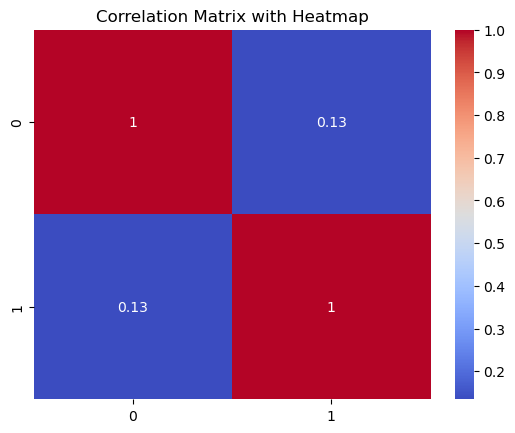

   feature        VIF
0        0  16.797787
1        1  16.797787


In [69]:
# Correlation matrix
corr_matrix = variateDFT.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Heatmap')
plt.show()

# Checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = variateDFT.columns
vif_data["VIF"] = [variance_inflation_factor(variateDFT.values, i) for i in range(len(variateDFT.columns))]
print(vif_data)


In [74]:
import pandas as pd
import statsmodels.api as sm

df=variateDFT
# Assuming 'df' contains your data with columns 'Year', 'Net_Income', and 'Capex'
X = sm.add_constant(df['Net Income'])  # Adds a constant term to the predictor
y = df['Capital Expenditures']

model = sm.OLS(y, X).fit()
df['Capex_Residual'] = model.resid  # Calculate and store residuals

# Review model summary to validate the linear relationship
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Capital Expenditures   R-squared:                       0.452
Model:                              OLS   Adj. R-squared:                  0.391
Method:                   Least Squares   F-statistic:                     7.410
Date:                  Sat, 27 Apr 2024   Prob (F-statistic):             0.0235
Time:                          02:05:49   Log-Likelihood:                -166.90
No. Observations:                    11   AIC:                             337.8
Df Residuals:                         9   BIC:                             338.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.532e+06   1.55e+06

/Users/myself/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [76]:
# Ensure your data includes a column for Capex residuals from the previous year
df['Capex_Residual_Previous_Year'] = df['Capex_Residual'].shift(1)  # Shifts data down to align with the next year

# Prepare your regression model
X_new = sm.add_constant(df[['Total_x', 'Capex_Residual_Previous_Year', 'Total.1']])
y_new = df['Capex_Residual']  # We are now predicting the residual

new_model = sm.OLS(y_new, X_new, missing='drop').fit()  # 'missing='drop'' handles shifted NaN values
print(new_model.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Capex_Residual_Previous_Year   R-squared:                       0.487
Model:                                      OLS   Adj. R-squared:                  0.340
Method:                           Least Squares   F-statistic:                     3.322
Date:                          Sat, 27 Apr 2024   Prob (F-statistic):             0.0967
Time:                                  02:07:44   Log-Likelihood:                -147.25
No. Observations:                            10   AIC:                             300.5
Df Residuals:                                 7   BIC:                             301.4
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/Users/myself/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


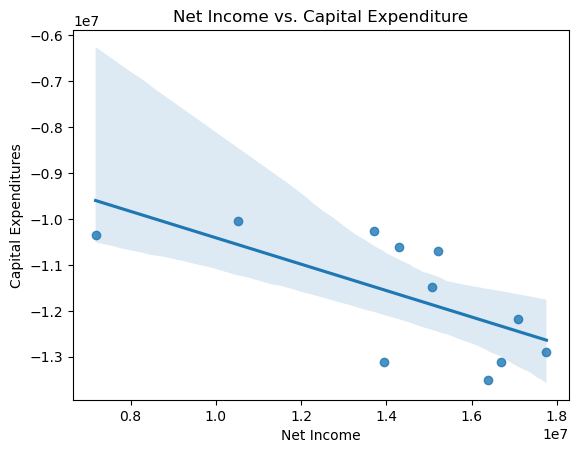

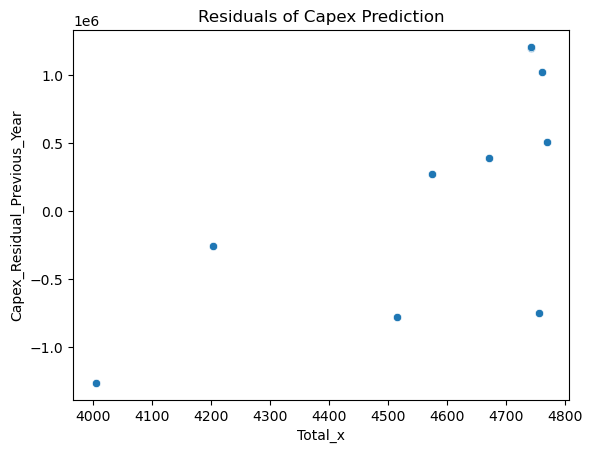

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationship between Capex and Net Income
sns.regplot(x='Net Income', y='Capital Expenditures', data=df)
plt.title('Net Income vs. Capital Expenditure')
plt.show()

# Residual plot
sns.scatterplot(x='Total_x', y='Capex_Residual_Previous_Year', data=df)
plt.title('Residuals of Capex Prediction')
plt.show()


In [ ]:
import pandas as pd

# Load the data from Excel files (Assuming the correct paths and sheet names)
cashflow_data = pd.read_excel(walmartPath+"walmartCashFlow.xlsx", skiprows=15)
store_count = pd.read_excel(walmartPath+"walmartCashFlow.xlsx", sheet_name="Yearly Store Count by Type", skiprows=2)
distribution_count = pd.read_excel(walmartPath+"walmartCashFlow.xlsx", sheet_name="Yearly DC", skiprows=1)

# Clean cashflow data
cashflow_data.iloc[:, 0] = cashflow_data.iloc[:, 0].str.replace('∟', '', regex=True)
cashflow_data.replace('\xa0', '', regex=True, inplace=True)
cashflow_data.replace('n.a.', pd.NA, inplace=True)
cashflow_data = cashflow_data.dropna(how='all', axis=1)
cashflow_data = cashflow_data.dropna(thresh=10)

# Assign year labels to cashflow data columns
number_of_years = cashflow_data.shape[1] - 1
base_year = 2022  # Adjust base year as appropriate
years = [str(base_year - i) for i in range(number_of_years)]
cashflow_data.columns = ['Cash Metric'] + years

# Melt cashflow data to long format
cashflow_data_long = cashflow_data.melt(id_vars=['Cash Metric'], var_name='Year', value_name='Value')
cashflow_data_long['Year'] = cashflow_data_long['Year'].astype(str)

# Correctly melting the store_count DataFrame to have 'Year' as a variable and store types as identifiers
store_count_melted = store_count.melt(id_vars='Year', var_name='Store Type', value_name='Store Count')
store_count_melted['Year'] = store_count_melted['Year'].astype(str)

# Load and prepare distribution count data
distribution_count['Year'] = distribution_count['Type'].astype(str)
distribution_count.drop(columns=['Type'], inplace=True)

# Merge all data with a left join on cashflow data
merged_data = pd.merge(cashflow_data_long, store_count_melted, on='Year', how='left')
final_merged_data = pd.merge(merged_data, distribution_count, on='Year', how='left')

# Display the first few rows of the final merged dataset
print(final_merged_data.head())
